In [55]:
#Importing librairies

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl

# Library for the statistic data vizualisation
import seaborn as sns


# Scikit-learn library: 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV

#Import time related library
import datetime
import requests
import time

In [56]:
import os, glob
path = r"C:\Users\annab\OneDrive\Documents\Python jobs\Hertfordshire Crime data analysis"
all_files = glob.glob(os.path.join(path, "2020-*"+"-hertfordshire-street.csv"))

df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged_2020   = pd.concat(df_from_each_file, ignore_index=True)
df_merged_2020.to_csv( "2020_merged_crime street_data.csv")

In [57]:
street=df_merged_2020.copy()
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,aee55a4328cf0afd21edd5675ec6012be2e88590d599a7...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.572494,51.819503,On or near B4506,E01017657,Aylesbury Vale 009C,Criminal damage and arson,Investigation complete; no suspect identified,NaN
1,bb98cd9921e97a9a91732fe6dc591aac1bd4dfbe796e14...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.805749,51.798149,On or near Lower Road,E01017687,Aylesbury Vale 019A,Violence and sexual offences,Status update unavailable,NaN
2,d71f4c982666547c2b1c8103a97aba230f2a606b8ef5e2...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.690612,51.792392,On or near Tring Hill,E01017629,Aylesbury Vale 021C,Burglary,Investigation complete; no suspect identified,NaN
3,260b88c1d30bf6a435f62f58618ebe2326923d1ccd7722...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.209422,51.658891,On or near Calvert Road,E01000249,Barnet 001B,Other theft,Investigation complete; no suspect identified,NaN
4,3c88c9532369f734b808e9a12fe4eb477d46f6a0914dab...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.198566,51.643150,On or near Meadow Close,E01000289,Barnet 004D,Violence and sexual offences,Unable to prosecute suspect,NaN


In [58]:
street.shape

(104149, 12)

In [59]:
street.isnull().sum()

Crime ID                  27745
Month                         0
Reported by                   0
Falls within                  0
Longitude                  1256
Latitude                   1256
Location                      0
LSOA code                  1256
LSOA name                  1256
Crime type                    0
Last outcome category     27745
Context                  104149
dtype: int64

In [60]:
# Get rid of 'Context' column because it has no record, we also don't need 'Crime ID' because we have 'Crime type'
street.drop(['Context'],axis=1,inplace=True)
street.shape

(104149, 11)

In [62]:
# Drop column: We can drop'LSOA code' as we have 'LSOA name'
street.drop('LSOA code',axis=1,inplace=True)
street.isnull().sum()

Crime ID                 27745
Month                        0
Reported by                  0
Falls within                 0
Longitude                 1256
Latitude                  1256
Location                     0
LSOA name                 1256
Crime type                   0
Last outcome category    27745
dtype: int64

In [63]:
# We don't need 'Longitude' and 'Latitude' for this case becuase we have 'LSOA name'
street.drop(['Longitude','Latitude'],axis=1,inplace=True)
street.isnull().sum()

Crime ID                 27745
Month                        0
Reported by                  0
Falls within                 0
Location                     0
LSOA name                 1256
Crime type                   0
Last outcome category    27745
dtype: int64

In [64]:
# drop missing rows in Crime ID
street.dropna(subset=['Crime ID','LSOA name'],inplace=True)
street.isnull().sum()

Crime ID                 0
Month                    0
Reported by              0
Falls within             0
Location                 0
LSOA name                0
Crime type               0
Last outcome category    0
dtype: int64

In [65]:
street.head()

,Crime ID,Month,Reported by,Falls within,Location,LSOA name,Crime type,Last outcome category
0,aee55a4328cf0afd21edd5675ec6012be2e88590d599a7...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near B4506,Aylesbury Vale 009C,Criminal damage and arson,Investigation complete; no suspect identified
1,bb98cd9921e97a9a91732fe6dc591aac1bd4dfbe796e14...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Lower Road,Aylesbury Vale 019A,Violence and sexual offences,Status update unavailable
2,d71f4c982666547c2b1c8103a97aba230f2a606b8ef5e2...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Tring Hill,Aylesbury Vale 021C,Burglary,Investigation complete; no suspect identified
3,260b88c1d30bf6a435f62f58618ebe2326923d1ccd7722...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Calvert Road,Barnet 001B,Other theft,Investigation complete; no suspect identified
4,3c88c9532369f734b808e9a12fe4eb477d46f6a0914dab...,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Meadow Close,Barnet 004D,Violence and sexual offences,Unable to prosecute suspect


In [67]:
# We then use Crime ID as the index
street.set_index('Crime ID',inplace=True)
street.head()

,Month,Reported by,Falls within,Location,LSOA name,Crime type,Last outcome category
Crime ID,,,,,,,
aee55a4328cf0afd21edd5675ec6012be2e88590d599a7abef1ac51c5f4d367b,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near B4506,Aylesbury Vale 009C,Criminal damage and arson,Investigation complete; no suspect identified
bb98cd9921e97a9a91732fe6dc591aac1bd4dfbe796e144c07eef26e047a50a0,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Lower Road,Aylesbury Vale 019A,Violence and sexual offences,Status update unavailable
d71f4c982666547c2b1c8103a97aba230f2a606b8ef5e23a3fa91ddd1b5e345c,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Tring Hill,Aylesbury Vale 021C,Burglary,Investigation complete; no suspect identified
260b88c1d30bf6a435f62f58618ebe2326923d1ccd7722b97412e81576fa782d,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Calvert Road,Barnet 001B,Other theft,Investigation complete; no suspect identified
3c88c9532369f734b808e9a12fe4eb477d46f6a0914dab8b0a69a8dea743bb40,2020-01,Hertfordshire Constabulary,Hertfordshire Constabulary,On or near Meadow Close,Barnet 004D,Violence and sexual offences,Unable to prosecute suspect


In [71]:
# We can also get rid of 'Falls within' because we analyse data in 'Hertfordshire'
street.drop('Falls within',axis=1, inplace=True)
street.shape

(75182, 6)

In [72]:
street.head()

,Month,Reported by,Location,LSOA name,Crime type,Last outcome category
Crime ID,,,,,,
aee55a4328cf0afd21edd5675ec6012be2e88590d599a7abef1ac51c5f4d367b,2020-01,Hertfordshire Constabulary,On or near B4506,Aylesbury Vale 009C,Criminal damage and arson,Investigation complete; no suspect identified
bb98cd9921e97a9a91732fe6dc591aac1bd4dfbe796e144c07eef26e047a50a0,2020-01,Hertfordshire Constabulary,On or near Lower Road,Aylesbury Vale 019A,Violence and sexual offences,Status update unavailable
d71f4c982666547c2b1c8103a97aba230f2a606b8ef5e23a3fa91ddd1b5e345c,2020-01,Hertfordshire Constabulary,On or near Tring Hill,Aylesbury Vale 021C,Burglary,Investigation complete; no suspect identified
260b88c1d30bf6a435f62f58618ebe2326923d1ccd7722b97412e81576fa782d,2020-01,Hertfordshire Constabulary,On or near Calvert Road,Barnet 001B,Other theft,Investigation complete; no suspect identified
3c88c9532369f734b808e9a12fe4eb477d46f6a0914dab8b0a69a8dea743bb40,2020-01,Hertfordshire Constabulary,On or near Meadow Close,Barnet 004D,Violence and sexual offences,Unable to prosecute suspect


In [74]:
street['Crime type'].value_counts()

Violence and sexual offences    28589
Criminal damage and arson        7621
Vehicle crime                    7270
Other theft                      7149
Shoplifting                      6577
Public order                     5750
Burglary                         4282
Drugs                            2864
Other crime                      1568
Bicycle theft                    1317
Theft from the person             825
Robbery                           762
Possession of weapons             608
Name: Crime type, dtype: int64

In [75]:
street['Crime type'].value_counts(normalize=True)

Violence and sexual offences    0.380264
Criminal damage and arson       0.101367
Vehicle crime                   0.096699
Other theft                     0.095089
Shoplifting                     0.087481
Public order                    0.076481
Burglary                        0.056955
Drugs                           0.038094
Other crime                     0.020856
Bicycle theft                   0.017517
Theft from the person           0.010973
Robbery                         0.010135
Possession of weapons           0.008087
Name: Crime type, dtype: float64

In [76]:
street['LSOA name'].value_counts()

Stevenage 008D               1197
Watford 009C                  990
Dacorum 015D                  921
Watford 009B                  807
Stevenage 011D                594
                             ... 
Central Bedfordshire 026A       1
Waltham Forest 022A             1
Enfield 011B                    1
South Bucks 001D                1
Stafford 009B                   1
Name: LSOA name, Length: 1302, dtype: int64

In [77]:
street['LSOA name'].value_counts(normalize=True)

Stevenage 008D               0.015921
Watford 009C                 0.013168
Dacorum 015D                 0.012250
Watford 009B                 0.010734
Stevenage 011D               0.007901
                               ...   
Central Bedfordshire 026A    0.000013
Waltham Forest 022A          0.000013
Enfield 011B                 0.000013
South Bucks 001D             0.000013
Stafford 009B                0.000013
Name: LSOA name, Length: 1302, dtype: float64

- Observation: It appears that the above 4 areas: Stevenage 008D/Watford 009C/Dacorum 015D/Watford 009B have the most of troubles occur

In [102]:
street.groupby('LSOA name')['Crime type'].value_counts().sort_values(ascending=False)

LSOA name            Crime type                  
Stevenage 008D       Violence and sexual offences    375
Watford 009C         Violence and sexual offences    373
Dacorum 015D         Shoplifting                     283
Stevenage 002E       Violence and sexual offences    282
Watford 009B         Shoplifting                     248
                                                    ... 
Hertsmere 011D       Shoplifting                       1
                     Robbery                           1
                     Bicycle theft                     1
Hertsmere 011C       Robbery                           1
Aylesbury Vale 002D  Public order                      1
Name: Crime type, Length: 7457, dtype: int64

In [ ]:
### Observation: 
- The worst crime is Stevenage 008D with violence and sexual offences, Watford 009C with violence and sexual offences, etc



In [106]:
street_st_albans = street[street['LSOA name'].str.contains('St Albans')]

street_st_albans.shape

(8137, 6)

In [108]:
street_st_albans.head()

,Month,Reported by,Location,LSOA name,Crime type,Last outcome category
Crime ID,,,,,,
a23387538313f6db54c35ae35d0067a88565d3d9308ead15988642316f7031d3,2020-01,Hertfordshire Constabulary,On or near Harpenden Rise,St Albans 001A,Other theft,Investigation complete; no suspect identified
490948d8b4f88bd29ae031eb4844c09412cfcc190d7bdd0f23ccd2c89ed8fe7e,2020-01,Hertfordshire Constabulary,On or near Park Mount,St Albans 001A,Other theft,Status update unavailable
5f4df184a0a851f9f9f6e99f4a1673fe5cf9255fbd62c93b9ceb6c30e1453fb0,2020-01,Hertfordshire Constabulary,On or near Harpenden Rise,St Albans 001A,Public order,Unable to prosecute suspect
fdc7ab15584ef7554ebaf3c5f7e51836cb2e5317a1dbc924056112be6e5b5712,2020-01,Hertfordshire Constabulary,On or near Luton Road,St Albans 001A,Vehicle crime,Investigation complete; no suspect identified
b190c5fbc4f2261e131036f2a67a8b97dda91b0406b01acdd078a95e047c8248,2020-01,Hertfordshire Constabulary,On or near Park Rise Close,St Albans 001A,Vehicle crime,Investigation complete; no suspect identified


In [119]:
street_st_albans.groupby('LSOA name')['Crime type'].value_counts().sort_values(ascending=False)

LSOA name       Crime type                  
St Albans 012B  Shoplifting                     188
St Albans 019C  Violence and sexual offences    176
St Albans 012B  Violence and sexual offences    156
St Albans 011D  Violence and sexual offences    119
St Albans 003C  Shoplifting                      99
                                               ... 
St Albans 009A  Bicycle theft                     1
St Albans 014A  Other crime                       1
                Public order                      1
St Albans 008D  Theft from the person             1
St Albans 014A  Burglary                          1
Name: Crime type, Length: 840, dtype: int64

In [112]:
street_st_albans.groupby('Location')['Crime type'].value_counts().sort_values(ascending=False)

Location                           Crime type                  
On or near Supermarket             Shoplifting                     373
On or near Petrol Station          Other theft                     133
On or near Sports/Recreation Area  Violence and sexual offences    113
On or near Petrol Station          Shoplifting                     106
On or near Waddington Road         Shoplifting                      99
                                                                  ... 
On or near Mile House Close        Other crime                       1
                                   Drugs                             1
On or near Midway                  Violence and sexual offences      1
                                   Vehicle crime                     1
On or near Lay Brook               Violence and sexual offences      1
Name: Crime type, Length: 3226, dtype: int64

In [114]:
st_albans_019C = street_st_albans[street_st_albans['LSOA name']=='St Albans 019C']

In [115]:
st_albans_019C.head()

,Month,Reported by,Location,LSOA name,Crime type,Last outcome category
Crime ID,,,,,,
20b7e53b97f821c93a90a13102a15059ab9b0ac4b1a6126a7de5e3fc3fa40829,2020-01,Hertfordshire Constabulary,On or near Heracles Close,St Albans 019C,Burglary,Investigation complete; no suspect identified
9fbf612186019e427fd1a84580421f0e220d1a789b315a5a900b0be13cfe91db,2020-01,Hertfordshire Constabulary,On or near Heracles Close,St Albans 019C,Burglary,Investigation complete; no suspect identified
993806a597e43fb6aff30319f837a745a3e7a2daac61b717bc6b5203ff22c584,2020-01,Hertfordshire Constabulary,On or near Heracles Close,St Albans 019C,Burglary,Investigation complete; no suspect identified
e86f486940f53151874e9fa18f1fcfe489df969f53920da077825611b7c462e6,2020-01,Hertfordshire Constabulary,On or near Hyde Lane,St Albans 019C,Drugs,Local resolution
acc2d3f738760f47f17ee56fb50068ca4c5e9719f1baf05efeef9a354a37924e,2020-01,Hertfordshire Constabulary,On or near Sports/Recreation Area,St Albans 019C,Drugs,Unable to prosecute suspect


In [117]:
st_albans_019C.groupby('Location')['Crime type'].value_counts().sort_values(ascending=False)

Location                           Crime type                  
On or near Harper Lane             Violence and sexual offences    67
On or near Sports/Recreation Area  Violence and sexual offences    60
On or near Harper Lane             Public order                     7
On or near Sports/Recreation Area  Public order                     6
On or near Moorlands               Violence and sexual offences     6
On or near Fairhaven               Violence and sexual offences     6
On or near Sports/Recreation Area  Vehicle crime                    5
On or near Frogmore                Violence and sexual offences     5
On or near Park Street Lane        Violence and sexual offences     5
On or near Harper Lane             Vehicle crime                    5
On or near Handley Page Way        Other theft                      5
On or near Sports/Recreation Area  Drugs                            4
On or near Harper Lane             Criminal damage and arson        4
On or near Radlett Road   

### Q How does the area in St Albans compares in terms of crime type? 

In [120]:
street_st_albans.head()

,Month,Reported by,Location,LSOA name,Crime type,Last outcome category
Crime ID,,,,,,
a23387538313f6db54c35ae35d0067a88565d3d9308ead15988642316f7031d3,2020-01,Hertfordshire Constabulary,On or near Harpenden Rise,St Albans 001A,Other theft,Investigation complete; no suspect identified
490948d8b4f88bd29ae031eb4844c09412cfcc190d7bdd0f23ccd2c89ed8fe7e,2020-01,Hertfordshire Constabulary,On or near Park Mount,St Albans 001A,Other theft,Status update unavailable
5f4df184a0a851f9f9f6e99f4a1673fe5cf9255fbd62c93b9ceb6c30e1453fb0,2020-01,Hertfordshire Constabulary,On or near Harpenden Rise,St Albans 001A,Public order,Unable to prosecute suspect
fdc7ab15584ef7554ebaf3c5f7e51836cb2e5317a1dbc924056112be6e5b5712,2020-01,Hertfordshire Constabulary,On or near Luton Road,St Albans 001A,Vehicle crime,Investigation complete; no suspect identified
b190c5fbc4f2261e131036f2a67a8b97dda91b0406b01acdd078a95e047c8248,2020-01,Hertfordshire Constabulary,On or near Park Rise Close,St Albans 001A,Vehicle crime,Investigation complete; no suspect identified


In [136]:
crime_type = street_st_albans['Crime type'].value_counts()[:4]
crime_type

Violence and sexual offences    2840
Shoplifting                      891
Vehicle crime                    888
Criminal damage and arson        830
Name: Crime type, dtype: int64

In [140]:
crime_type=pd.DataFrame(crime_type)
crime_type.index

Index(['Violence and sexual offences', 'Shoplifting', 'Vehicle crime', 'Criminal damage and arson'], dtype='object')

In [138]:
# Create a crosstab between areas and crime type
cross_zone = pd.crosstab(street_st_albans['LSOA name'],pd.DataFrame(crime_type))
cross_zone

""


In [128]:
# Save the smaller table as crime_zone
crime_zone=cross_zone.loc['St Albans 019C':'St Albans 018C']
crime_zone

Crime type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
LSOA name,,,,,,,,,,,,,
St Albans 019C,2,21,25,6,3,15,0,22,0,3,2,25,176
St Albans 012B,9,11,42,28,12,32,6,71,4,188,13,15,156
St Albans 011D,7,13,20,20,2,13,1,13,3,2,0,23,119
St Albans 015A,1,3,16,6,1,16,1,5,0,6,0,8,68
St Albans 009A,1,8,13,3,7,5,4,25,1,0,0,13,68
St Albans 012D,12,10,30,14,4,23,2,11,2,2,1,19,66
St Albans 007D,0,4,32,7,3,12,0,13,0,0,0,4,60
St Albans 016C,0,10,12,7,5,10,3,9,0,18,1,18,60
St Albans 016A,1,4,13,5,4,6,1,8,0,0,0,7,60


In [143]:
crime_zone=crime_zone.loc[:,crime_type.index]
crime_zone

,Violence and sexual offences,Shoplifting,Vehicle crime,Criminal damage and arson
LSOA name,,,,
St Albans 019C,176,3,25,25
St Albans 012B,156,188,15,42
St Albans 011D,119,2,23,20
St Albans 015A,68,6,8,16
St Albans 009A,68,0,13,13
St Albans 012D,66,2,19,30
St Albans 007D,60,0,4,32
St Albans 016C,60,18,18,12
St Albans 016A,60,0,7,13


<AxesSubplot:xlabel='LSOA name'>

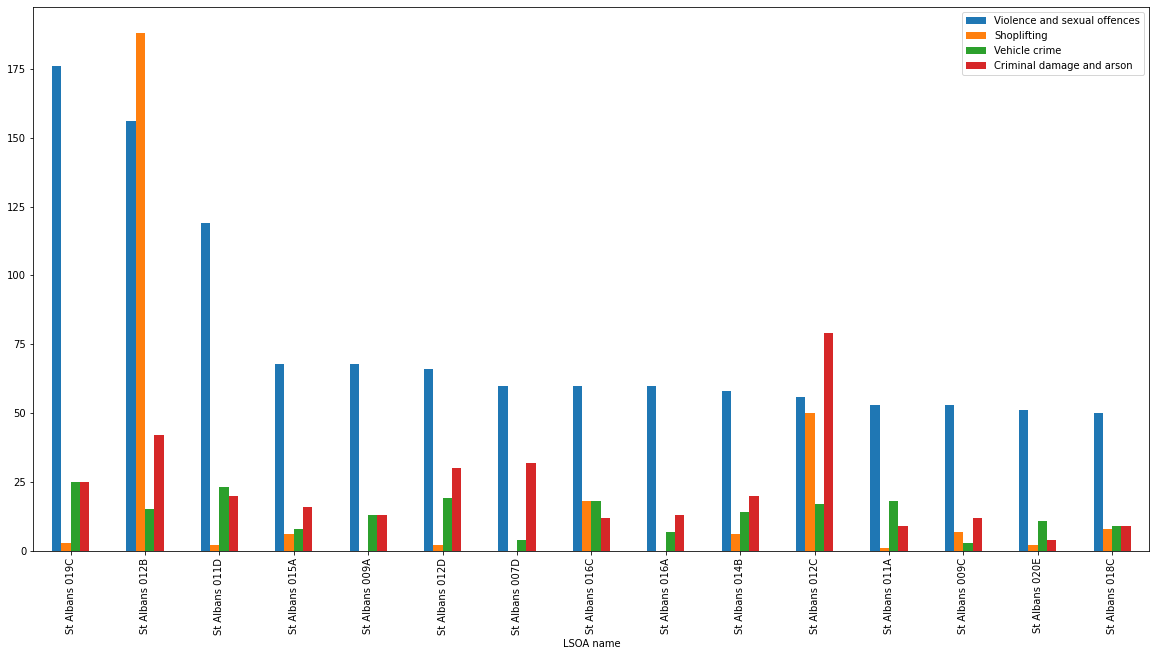

In [144]:
crime_zone.plot(kind='bar', figsize=(20,10))

### Observation: 
- By just looking at above, looks like 'St Albans 012B', 'St Albans 019c' seem to be the areas to avoid. 
- Now I like to see the gragh which shows the total numbers of crime. A stacked graph is a good idea. 

Text(0.5, 1.0, 'compare crime vs areas')

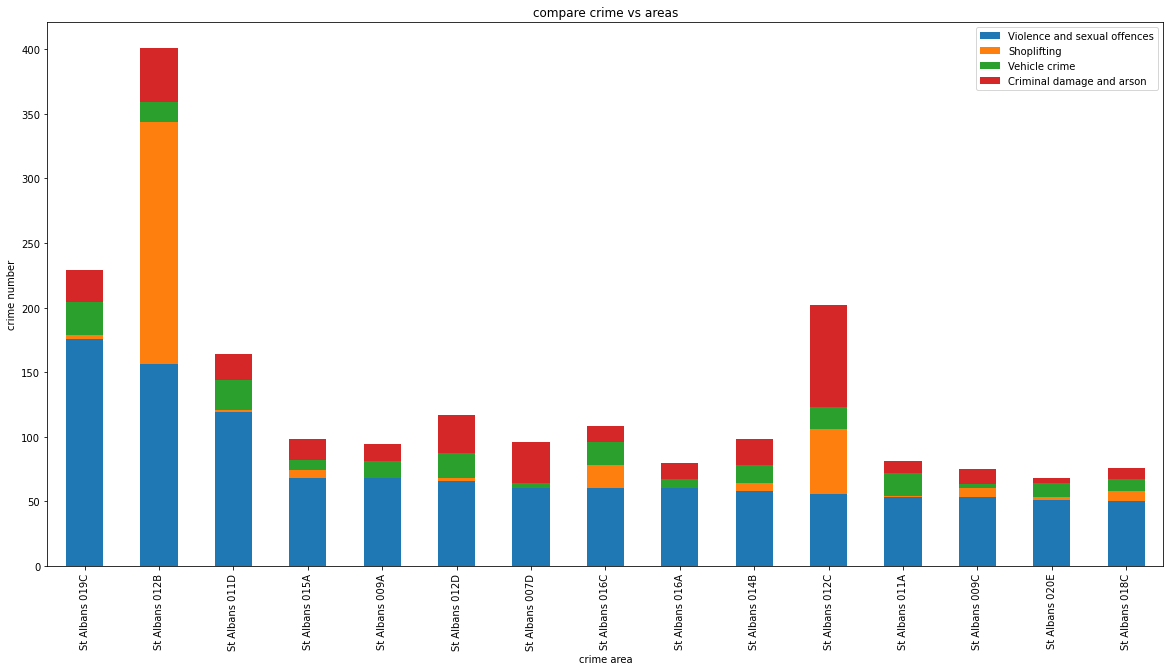

In [146]:
crime_zone.plot(kind='bar', figsize=(20,10),stacked=True)
plt.xlabel('crime area')
plt.ylabel('crime number') 
plt.title('compare crime vs areas')

In [ ]:
### Observation: 
- From above stacked graph, we can see 'St Albans 012B' and 'St Albans 019c' and 'St Albans 012C' are the worst areas in terms of total crime
- 'St Albans 019C' has high percentage focused on 'violance and sexual' but not so much on 'Shop lifting' suggests the area might be an open space with no residential buildings surrounding
